In [1]:
import numpy as np
import matplotlib.pyplot as plt
import setFigureConfig as sfc

from colorschemes import get_comp_cols
compcols = get_comp_cols()

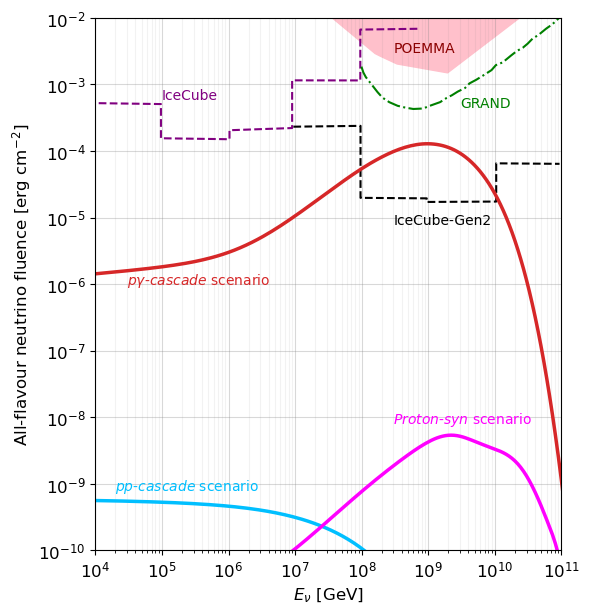

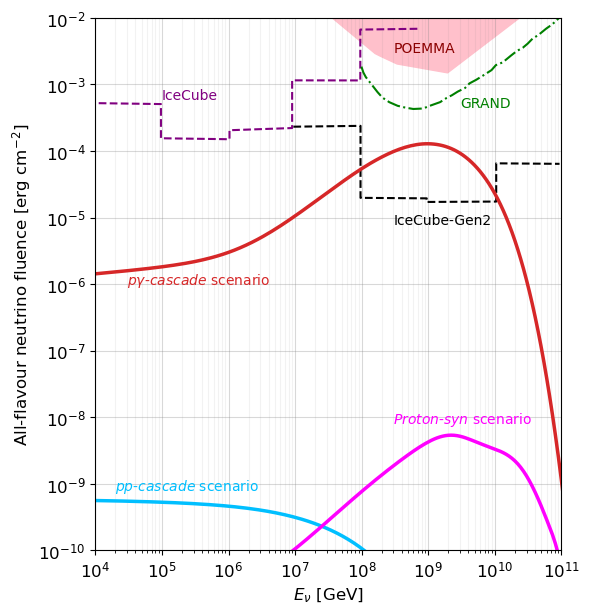

In [3]:
plt.figure(figsize=(6,7.5))
plt.loglog()
GeV2erg=1.0/624

# plot sensitivities
data=np.loadtxt("sensitivities/IceCube")
plt.plot(data[:,0],data[:,1]*GeV2erg,"--",color="purple",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/IceCubeGen2")
plt.plot(data[:,0],data[:,1]*GeV2erg,"--",color="black",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/grand3yr")
plt.plot(data[:,0],data[:,1]*1e8*4*3.14*GeV2erg,"-.",color="green",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/chant3yr")
#plt.plot(data[:,0],data[:,1]*1e8*4*3.14*GeV2erg,":",color="gray",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/ara3yr")
#plt.plot(data[:,0],data[:,1]*1e8*3.14*4*GeV2erg,"-",color="gray",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/POEMMA")
plt.fill_between(data[:6,0],data[:6,1]*GeV2erg, data[6:,1]*GeV2erg,color="pink")

plt.text(1e5,6e-4,"IceCube", color = "purple")
plt.text(3e8,8e-6,"IceCube-Gen2", color = "k")
plt.text(3e9,4.5e-4, "GRAND", color = "green")
plt.text(3e8,3e-3,"POEMMA", color = "darkred")

#plt.text(8e9,4e-10,"GRAND 3yr",color="gray",rotation=40,fontsize=8)
#plt.text(1e9,7e-10,"CHANT 3yr",color="gray",rotation=40,fontsize=8)
#plt.text(5e7,4e-9,"ARA/ARIANNA 3yr",color="gray",rotation=-10,fontsize=8)
#plt.text(5e8,3e-8,"IceCube(2018)",color="black",rotation=20,fontsize=8)
#plt.text(7e9,1.2e-8,"POEMMA 10 yr",color="gray",rotation=40,fontsize=8)


t_obs = 1e3 #s
Neu1 = np.genfromtxt("pg-cascade-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu1[:,0]/1e9,Neu1[:,1]*t_obs, linewidth=2.5, color = "tab:red", label = r"$p\gamma$-cas. scenario")
plt.text(3e4, 1e-6, r"$p\gamma$-$cascade$ scenario", color="tab:red")

Neu2 = np.genfromtxt("pp-cascade-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu2[:,0]/1e9, Neu2[:,1]*t_obs, linewidth =2.5, color = "deepskyblue", label = r"$pp$-cas. scenario")
plt.text(2e4, 8e-10, r"$pp$-$cascade$ scenario", color = "deepskyblue")

Neu3 = np.genfromtxt("proton-syn-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu3[:,0]/1e9, Neu3[:,1]*t_obs, linewidth = 2.5, color = "magenta", label = r"$p$-syn scenario")
plt.text(3e8, 8e-9, r"$Proton$-$syn$ scenario", color = "magenta")


plt.xlabel(r"$E_\nu$ [GeV]", fontsize=12)
plt.ylabel(r"All-flavour neutrino fluence [$\rm erg~cm^{-2}$]", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(10.0**np.arange(-10,1,1),fontsize = 12 )

plt.xlim(1e4,1e11)
plt.ylim(1e-10,1e-2)
# plt.legend(loc=2)

plt.gca().set_aspect('equal')
plt.grid(color="gray", alpha = 0.1, which="minor")
plt.grid(color="gray", alpha = 0.3, which="major")
#plt.title("Neutrino fluence (1 ks)")
plt.tight_layout()
plt.show()
# plt.savefig("figs_pdf/All-flavour-neutrino-fluence.pdf")
# plt.savefig("figs_png/All-flavour-neutrino-fluence.png")

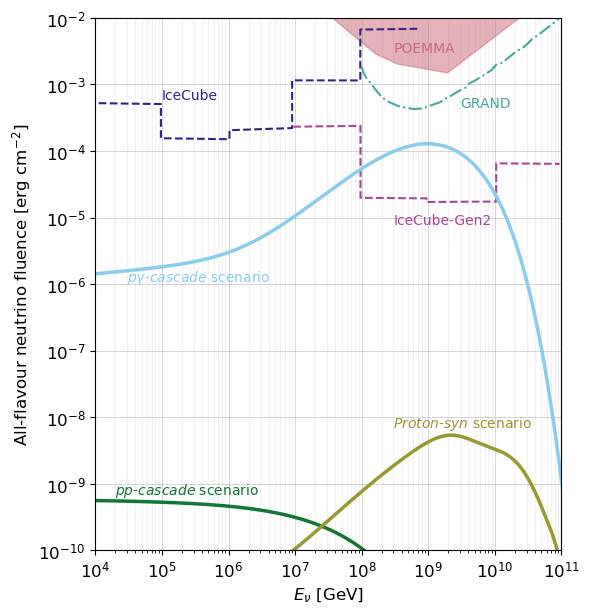

In [21]:
plt.figure(figsize=(6,7.5))
plt.loglog()
GeV2erg=1.0/624

# plot sensitivities
data=np.loadtxt("sensitivities/IceCube")
plt.plot(data[:,0],data[:,1]*GeV2erg,"--",color=compcols["in"],alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/IceCubeGen2")
plt.plot(data[:, 0], data[:, 1]*GeV2erg, "--",
         color=compcols["pair"], alpha=1, linewidth=1.5)

data=np.loadtxt("sensitivities/grand3yr")
plt.plot(data[:, 0], data[:, 1]*1e8*4*3.14*GeV2erg, "-.",
         color=compcols["pi"], alpha=1, linewidth=1.5)

# data=np.loadtxt("sensitivities/chant3yr")
#plt.plot(data[:,0],data[:,1]*1e8*4*3.14*GeV2erg,":",color="gray",alpha=1,linewidth=1.5)

# data=np.loadtxt("sensitivities/ara3yr")
#plt.plot(data[:,0],data[:,1]*1e8*3.14*4*GeV2erg,"-",color="gray",alpha=1,linewidth=1.5)

data=np.loadtxt("sensitivities/POEMMA")
plt.fill_between(data[:6, 0], data[:6, 1]*GeV2erg,
                 data[6:, 1]*GeV2erg, color=compcols["mu"], alpha=0.5)

plt.text(1e5, 6e-4, "IceCube", color=compcols["in"])
plt.text(3e8, 8e-6, "IceCube-Gen2", color=compcols["pair"])
plt.text(3e9, 4.5e-4, "GRAND", color=compcols["pi"])
plt.text(3e8, 3e-3, "POEMMA", color=compcols["mu"])

#plt.text(8e9,4e-10,"GRAND 3yr",color="gray",rotation=40,fontsize=8)
#plt.text(1e9,7e-10,"CHANT 3yr",color="gray",rotation=40,fontsize=8)
#plt.text(5e7,4e-9,"ARA/ARIANNA 3yr",color="gray",rotation=-10,fontsize=8)
#plt.text(5e8,3e-8,"IceCube(2018)",color="black",rotation=20,fontsize=8)
#plt.text(7e9,1.2e-8,"POEMMA 10 yr",color="gray",rotation=40,fontsize=8)


t_obs = 1e3 #s
Neu1 = np.genfromtxt("pg-cascade-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu1[:,0]/1e9,Neu1[:,1]*t_obs, linewidth=2.5, color = compcols["pg"], label = r"$p\gamma$-cas. scenario")
plt.text(3e4, 1.1e-6, r"$p\gamma$-$cascade$ scenario", color=compcols["pg"])

Neu2 = np.genfromtxt("pp-cascade-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu2[:, 0]/1e9, Neu2[:, 1]*t_obs, linewidth=2.5,
         color=compcols["pi0"], label=r"$pp$-cas. scenario")
plt.text(2e4, 7e-10, r"$pp$-$cascade$ scenario", color=compcols["pi0"])

Neu3 = np.genfromtxt("proton-syn-neutrinos.txt", skip_header=1, delimiter=",")
plt.plot(Neu3[:, 0]/1e9, Neu3[:, 1]*t_obs, linewidth=2.5,
         color=compcols["p"], label=r"$p$-syn scenario")
plt.text(3e8, 7e-9, r"$Proton$-$syn$ scenario", color=compcols["p"])


plt.xlabel(r"$E_\nu$ [GeV]", fontsize=12)
plt.ylabel(r"All-flavour neutrino fluence [$\rm erg~cm^{-2}$]", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(10.0**np.arange(-10,1,1),fontsize = 12 )

plt.xlim(1e4,1e11)
plt.ylim(1e-10,1e-2)
# plt.legend(loc=2)

plt.gca().set_aspect('equal')
plt.grid(color="gray", alpha = 0.1, which="minor")
plt.grid(color="gray", alpha = 0.3, which="major")
#plt.title("Neutrino fluence (1 ks)")
plt.tight_layout()
plt.show()
plt.savefig("figs_pdf/All-flavour-neutrino-fluence_colsMarc.pdf")
plt.savefig("figs_png/All-flavour-neutrino-fluence_colsMarc.png")